<!-- ---------------------------------------------------- -->
  <h1>Zadatak</h1>
<!-- ---------------------------------------------------- -->

Učitati pandas i numpy biblioteku i matplotlib.pyplot

In [2]:
# Učitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Kreiranje baze podataka  

Skup podataka sadržaće imena 1000 beba i broj rođenih beba sa tim imenom za godinu 2016. Biće dodati i duplikati, odnosno može se isto ime javiti više puta. Ponovljena imena predstavljaju podatke sakupljene iz različitih porodilišta. Počećemo sa kreiranjem slučajnog skupa podataka. 

In [3]:
# Inicijalni skup imena napravi kao vektor 5 stringova 
# sa imenima: Nikola, Jelena, Milica, Aleksandar i Luka
names = ['Nikola', 'Sara', 'Marko', 'Milica', 'Luka']



Da bismo napravili listu od 1000 imena koristeći 5 imena datih u vektoru,
uradićemo sledeće:  

* Generisati novu listu imena ponavljajući na slučaj odabrano ime iz date liste

Da bismo to uradili, koristićemo sledeće funkcije ***randint***, ***len***, ***range***, and ***zip***.   

In [5]:
len?


**randint(low=0,high=len(names))** - Generisanje slučajnog broja između 0 i dužine liste "names".    

**names[n]** - Selektovanje imena čiji je indeks n.  

**for i in range(n)** - For petlja po i gde je i jednako 1,2,3,....n.  

Selektuj slučajno ime iz liste names i to ponovi n=1000 puta smeštajući rezultate u novu listu pod nazivom random_names. Prikaži prvih 10 i poslednjih 10 članova nove liste.

In [6]:
random_names = []
for i in range(1000):
    n = np.random.randint(low=0, high=len(names))
    random_names.append(names[n])
    
print('Prvih 10: ', random_names[:10])
print('Od 15. do 20. elementa: ', random_names[15:21])

Prvih 10:  ['Marko', 'Milica', 'Nikola', 'Sara', 'Milica', 'Sara', 'Luka', 'Sara', 'Marko', 'Sara']
Od 15. do 20. elementa:  ['Nikola', 'Luka', 'Sara', 'Sara', 'Marko', 'Sara']


* Generisati n slučajnih brojeva između 0 i 1000 koji će predstavljati broj beba  

In [7]:
# Broj rođenih beba po imenu u 2016. smesti u listu pod nazivom births
# Prikaži prvih 10 i poslednjih 10.

births = []
for i in range(1000):
    births.append(np.random.randint(low=1, high=500))

print('Prvih 10: ', births[:10])
print('Poslednjih 10: ', births[-10:])


Prvih 10:  [247, 322, 353, 480, 258, 343, 86, 472, 369, 66]
Poslednjih 10:  [287, 172, 69, 376, 455, 289, 101, 82, 351, 347]


* Spoji (merge) ***names*** i ***births*** liste koristeći funkciju ***zip***.

In [8]:
# Novi skup podataka nazovi BabyDataSet 
# Prikaži prvih i poslednjih 10 vrsta 

BabyDataSet=zip(random_names, births)

Završili smo kreiranje skupa podataka i sada ćemo koristeći ***pandas*** da prebacimo taj skup u csv fajl. 

Prethodno moramo skup podataka pretvoriti u ***DataFrame*** objekat. To je format sličan sql tabeli ili excel spreadsheet-u.

Prikazati nekoliko vrsta iz kreiranog DataFrame-a

In [9]:
BabyDataSet = pd.DataFrame(BabyDataSet)
BabyDataSet.head()

,0,1
0,Marko,247
1,Milica,322
2,Nikola,353
3,Sara,480
4,Milica,258


* Exportovanje DataFrame-a u ***text*** fajl. Fajl ćemo nazvati ***births1880.txt***. Funkcija ***to_csv*** se koristi za eksportovanje. Fajl će biti snimljen na lokaciju gde se nalazi i notebook, osim ako je drugačije navedeno.

Parametri koje ćemo koristiti su ***index*** i ***header***. Postavljanje ovih parametara na False će sprečiti da se eksportuju indexi i headeri. Pokušaj da ih postaviš i na True radi boljeg razumevanja. 

In [82]:
BabyDataSet.to_csv('births2016.txt',index=False,header=False)
# df.to_excel('births1880.xlsx', index=False)

## Preuzimanje podataka

Kako bismo učitali text fajl, koristićemo funkciju *read_csv* iz *pandas* biblioteka.

Za sada ćemo koristiti samo jedan parametar, a to je prosleđivanje putanje do traženog text fajla.  

Location = C:\Users\TYPE_USER_NAME\.xy\startups\births2016.txt  

***Pažnja:*** Prilagoditi putanju. 

In [83]:
df = pd.read_csv('births2016.txt')


Kod navođenja putanje dodati prefiks ***r*** ispred string-a. S obzirom da su kose crte specijalni karakteri, postavljanjem prefiksa ***r*** dati string će moći celokupno da se učita.  

Da bismo videli sadržaj dataframe-a možemo koristiti ***head()*** funkciju koja će po default-u vratiti prvih 5 uzoraka. Prosleđivanjem parametra, taj broj se može menjati. 

In [84]:
df.head()

,Marko,247
0,Milica,322
1,Nikola,353
2,Sara,480
3,Milica,258
4,Sara,343


Ukoliko ***read_csv*** tretira prvi podatak kao header imena, a ne bi trebalo, treba funkciji proslediti parametar ***header*** postavljen na ***None***.

In [96]:
df = pd.read_csv('births2016.txt', header=None)

In [97]:
df.head()

,0,1
0,Marko,247
1,Milica,322
2,Nikola,353
3,Sara,480
4,Milica,258


In [98]:
df.tail()

,0,1
995,Sara,289
996,Marko,101
997,Luka,82
998,Luka,351
999,Nikola,347


Ako želimo da postavimo i imena kolona, moramo dodati još jedan parametar ***names***. Tada možemo izistaviti parametar *header*

In [99]:
df.columns=['Names', 'Births']

In [100]:
df.head()

,Names,Births
0,Marko,247
1,Milica,322
2,Nikola,353
3,Sara,480
4,Milica,258


In [101]:
df.tail()

,Names,Births
995,Sara,289
996,Marko,101
997,Luka,82
998,Luka,351
999,Nikola,347


In [102]:
print(df.shape)

(1000, 2)


## Priprema podataka

Proverimo da li se javljaju samo 5 jedinstvenih imena. 

Za to se koristi funkcija ***unique***.

In [103]:
# Method 1:
print(pd.unique(df['Names']))

['Marko' 'Milica' 'Nikola' 'Sara' 'Luka']


In [104]:
indexes_to_drop = df.loc[df['Births']==0].index
print(indexes_to_drop.values)
df.drop(indexes_to_drop, axis=0, inplace=True)
print(df.shape)

[]
(1000, 2)


Agregacija podataka kako bi postojalo jedno ime samo jednom u tabeli. Za ovo se koristi ***groupby*** funkcija. 

In [109]:
names = df.groupby('Names')
df = names.sum()
df

,Births
Names,
Luka,44974
Marko,55156
Milica,46782
Nikola,51874
Sara,49229


In [58]:
df.loc['Luka','Births']

44974

## Analiza podataka

Kako bismo pronašli najpopularnije ime možemo uraditi sledeće. 

In [27]:
value_sorted = np.sort(df['Births'])[-1]
index_sorted = np.argsort(df['Births'])[-1]
print('Najpopularnije ime je ', df.index[index_sorted], ' i javlja se ', 
      value_sorted, ' puta.')

Najpopularnije ime je  Marko  i javlja se  55156  puta.


## Prezentacija podataka

Možemo iscrtati ***Births*** kolonu u opadajućem redosledu i prikazati imena kao labele grafa.


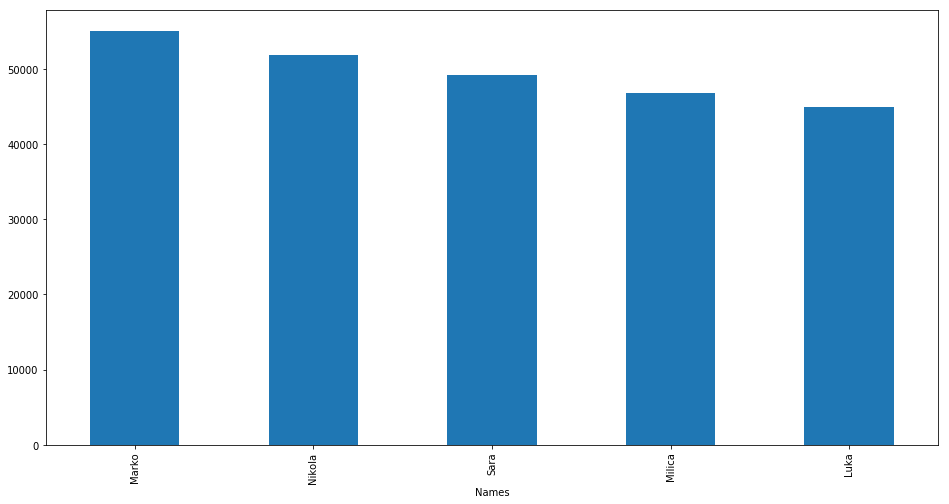

In [115]:
# Kreirati graf koristeći funkciju bar i ispisati najpopularnije ime
plt.figure(figsize=(16,8))
df_sort = df.sort_values(by='Births')
df_sort['Births'][::-1].plot.bar()